# Comparison of NNs and CGP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Body-brain evolution with GA 

In [2]:
dfs = []
sampler = "all"
for seed in range(10):
    # GA
    tmp_df = pd.read_csv(f"../results/ga/evo-body-10x10_{seed}.csv")
    tmp_df["solver"] = "GA"
    tmp_df["controller"] = "CGP"
    tmp_df["seed"] = seed
    dfs.append(tmp_df)
    tmp_df = pd.read_csv(f"../results/ga/evo-body-nn-10x10-walker_{seed}.csv")
    tmp_df["solver"] = "GA"
    tmp_df["controller"] = "NN"
    tmp_df["seed"] = seed
    dfs.append(tmp_df)
    # ME
    tmp_df = pd.read_csv(f"../results/me/evo-body-10x10-floor-{sampler}_{seed}.csv")
    tmp_df["sampler"] = sampler
    tmp_df["solver"] = "ME"
    tmp_df["controller"] = "CGP"
    tmp_df["seed"] = seed
    dfs.append(tmp_df)
    try:
        tmp_df = pd.read_csv(f"../results/me_nn/evo-body-10x10-walker-{sampler}_{seed}.csv")
        tmp_df["sampler"] = sampler
        tmp_df["solver"] = "ME"
        tmp_df["controller"] = "NN"
        tmp_df["seed"] = seed
        dfs.append(tmp_df)
    except FileNotFoundError:
        print(f"ME+NN {seed}")
df = pd.concat(dfs)
df["representation"] = df["controller"] + "+" + df["solver"]
df.head()

,iteration,max_fitness,time,current_time,solver,controller,seed,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,sampler,invalid_individuals,representation
0,1,0.732285,7.725963,2024-08-09 16:57:02.912419,GA,CGP,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGP+GA
1,2,0.732285,7.299634,2024-08-09 16:57:10.230573,GA,CGP,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGP+GA
2,3,0.732285,7.345170,2024-08-09 16:57:17.576247,GA,CGP,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGP+GA
3,4,1.220242,7.475896,2024-08-09 16:57:25.052683,GA,CGP,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGP+GA
4,5,2.104340,7.290238,2024-08-09 16:57:32.343374,GA,CGP,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGP+GA


In [3]:
final_df = df[df["iteration"] == max(df["iteration"])]

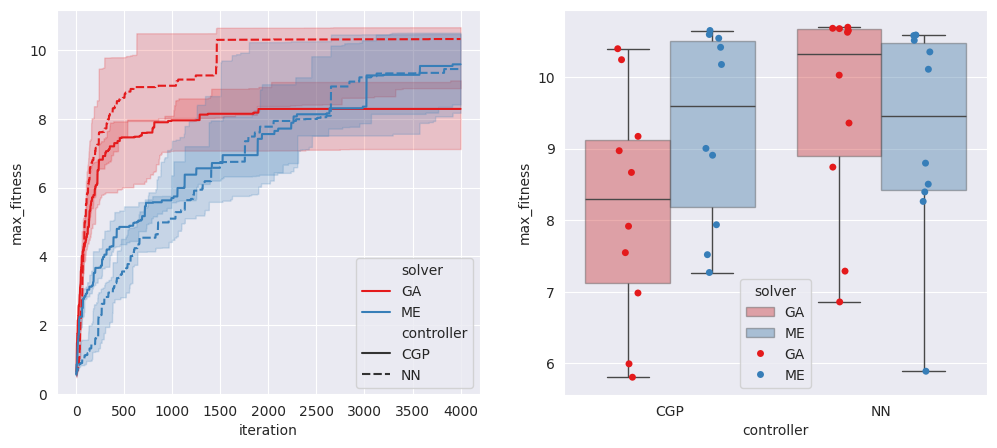

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(df,
             x="iteration",
             y="max_fitness",
             estimator="median",
             errorbar=("pi", 50),
             hue="solver",
             style="controller",
             palette="Set1",
             ax=axs[0]
             )
sns.boxplot(
    final_df,
    x="controller",
    y="max_fitness",
    hue="solver",
    palette="Set1",
    boxprops={'alpha': 0.4},
    ax=axs[1]
)
sns.stripplot(final_df,
              x="controller",
              y="max_fitness",
              hue="solver",
              palette="Set1",
              dodge=True,
              ax=axs[1])
plt.show()

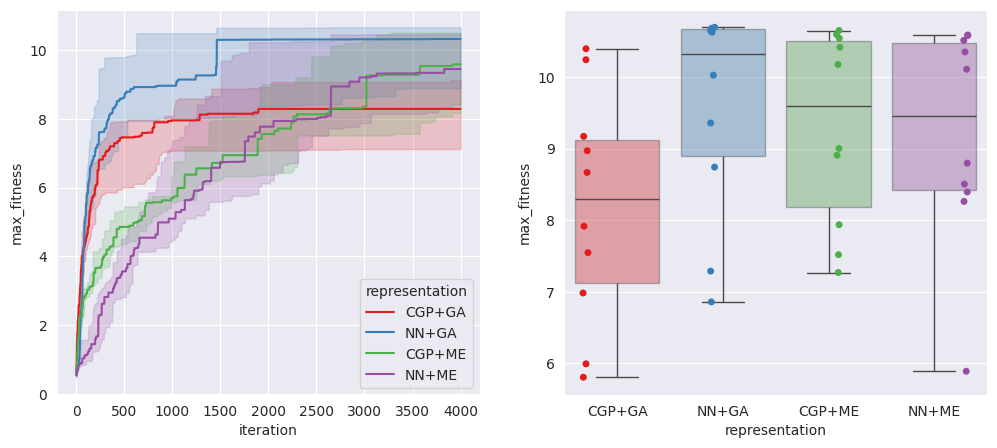

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(df,
             x="iteration",
             y="max_fitness",
             estimator="median",
             errorbar=("pi", 50),
             hue="representation",
             palette="Set1",
             ax=axs[0]
             )
sns.boxplot(
    final_df,
    x="representation",
    y="max_fitness",
    hue="representation",
    palette="Set1",
    boxprops={'alpha': 0.4},
    ax=axs[1]
)
sns.stripplot(final_df,
              x="representation",
              y="max_fitness",
              hue="representation",
              palette="Set1",
              dodge=True,
              ax=axs[1])
plt.show()